In [4]:
import os
import json
import time
import math
import matplotlib.pyplot as plt
from core.data_processor import DataLoader
from core.model import Model
from keras.model import newaxis

[Model] Model Compiled
Time taken: 0:00:00.800505
[Model] Training Started
[Model] 1 epochs, 32 batch size, 124 batches per epoch
Epoch 1/1
124/124 [==============================] - 22s 176ms/step - loss: 0.0010
[Model] Training Completed. Model saved as saved_models/09092018-181640-e1.h5
Time taken: 0:00:25.918585


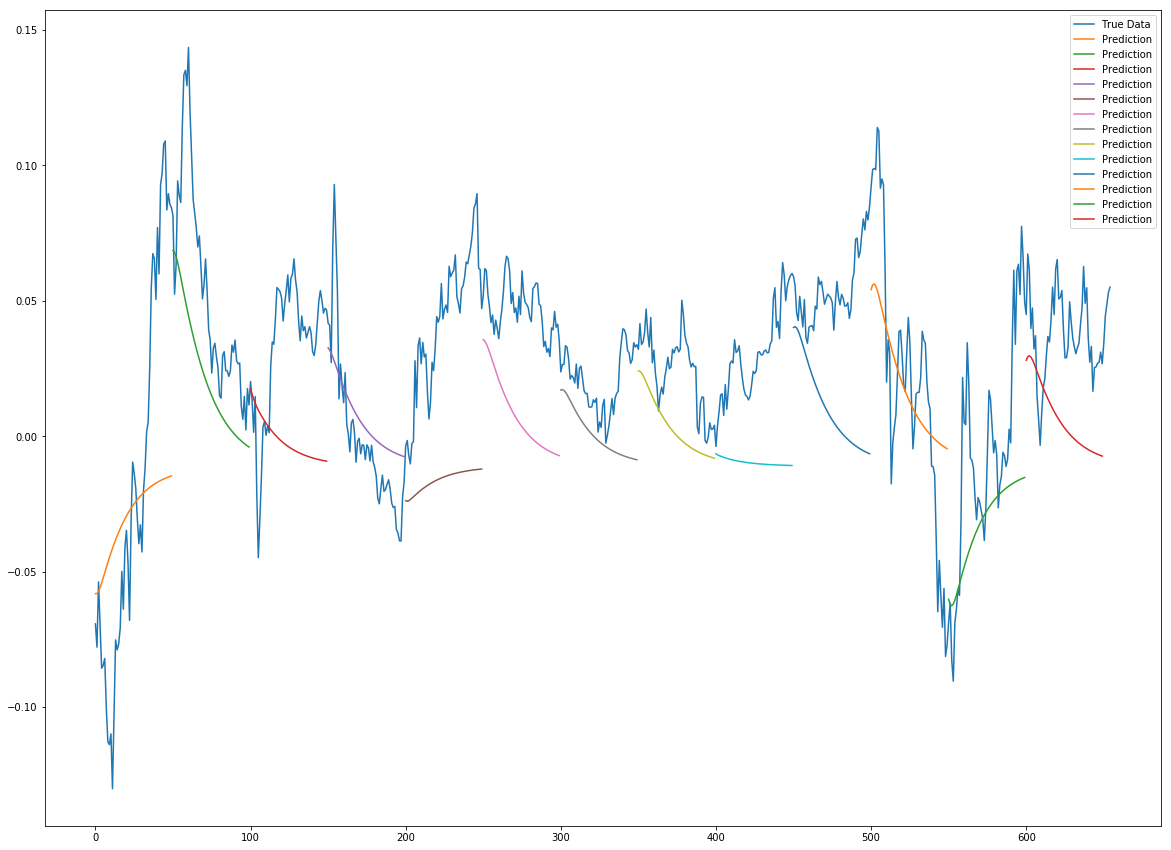

In [6]:
def main():
    configs = json.load(open('config.json', 'r'))

    data = DataLoader(
        os.path.join('data', configs['data']['filename']),
        configs['data']['train_test_split'],
        configs['data']['columns']
    )

    model = Model()
    model.build_model(configs)
    x, y = data.get_train_data(
        seq_len = configs['data']['sequence_length'],
        ndim=configs['model']['layers'][0]['input_dim'],
        normalise = configs['data']['normalise']
    )

    # in-memory training
    model.train(
        x,
        y,
        epochs = configs['training']['epochs'],
        batch_size = configs['training']['batch_size']
    )

    predictions = model.predict_point_by_point(x)
    print(predictions[-1])

if __name__=='__main__':
    main()

In [8]:
arr = np.array([[10, 11, 12, 13, 26, 28, 11],
 [ 4,  9, 19, 20, 21, 26, 12],
 [ 1,  7, 10, 23, 28, 32, 16],
 [ 4,  6,  7, 10, 13, 25,  3],
 [ 4,  6, 15, 17, 30, 31, 16],
 [ 1,  3, 10, 21, 26, 27,  6],
 [ 1,  9, 19, 21, 23, 26,  7],
 [ 5,  8,  9, 14, 17, 23,  8],
 [ 5,  9, 18, 20, 22, 30,  9],
 [ 1,  2,  8, 13, 17, 24, 13],
 [ 4,  5, 11, 12, 30, 32, 15],
 [ 2, 12, 16, 17, 27, 30, 12],
 [ 8, 13, 17, 21, 23, 32, 12],
 [ 3,  5,  7,  8, 21, 31,  2],
 [ 4, 11, 19, 25, 26, 32, 13],
 [11, 17, 28, 30, 31, 33,  6],
 [ 5,  8, 18, 23, 25, 31,  6],
 [ 5, 16, 19, 20, 25, 28, 13],
 [ 4,  8, 12, 13, 16, 33,  9],
 [ 7, 10, 25, 26, 27, 32,  4],
 [14, 15, 18, 25, 26, 30,  1],
 [ 2,  7, 11, 12, 14, 32,  8],
 [ 1, 10, 20, 22, 26, 31,  2],
 [ 2,  7, 15, 17, 22, 30, 14],
 [ 1,  5, 11, 13, 14, 27, 12],
 [ 8, 13, 15, 26, 29, 31, 16],
 [ 1, 11, 14, 17, 27, 28, 15],
 [ 6, 13, 16, 20, 28, 32,  7],
 [ 2,  7, 15, 26, 29, 32, 10]])
arr1 = np.array([[2,  7, 15, 26, 29, 32, 10]])
print(arr1[0,0])
print(arr[1:])

2
[[ 4  9 19 20 21 26 12]
 [ 1  7 10 23 28 32 16]
 [ 4  6  7 10 13 25  3]
 [ 4  6 15 17 30 31 16]
 [ 1  3 10 21 26 27  6]
 [ 1  9 19 21 23 26  7]
 [ 5  8  9 14 17 23  8]
 [ 5  9 18 20 22 30  9]
 [ 1  2  8 13 17 24 13]
 [ 4  5 11 12 30 32 15]
 [ 2 12 16 17 27 30 12]
 [ 8 13 17 21 23 32 12]
 [ 3  5  7  8 21 31  2]
 [ 4 11 19 25 26 32 13]
 [11 17 28 30 31 33  6]
 [ 5  8 18 23 25 31  6]
 [ 5 16 19 20 25 28 13]
 [ 4  8 12 13 16 33  9]
 [ 7 10 25 26 27 32  4]
 [14 15 18 25 26 30  1]
 [ 2  7 11 12 14 32  8]
 [ 1 10 20 22 26 31  2]
 [ 2  7 15 17 22 30 14]
 [ 1  5 11 13 14 27 12]
 [ 8 13 15 26 29 31 16]
 [ 1 11 14 17 27 28 15]
 [ 6 13 16 20 28 32  7]
 [ 2  7 15 26 29 32 10]]
